
# CS 109A/STAT 121A/AC 209A/CSCI E-109A: 
# Midterm - 2017

**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS


- You must submit the Midterm on your own. ** No group submissions are allowed**. You may use any print or online resources but ** you may not work or consult with others**.
- Restart the kernel and run the whole notebook again before you submit. 
- Please submit both a notebook and a pdf.
 

---


## Flight Delays

The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights are published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations.


## Data
Each entry of the flights.csv file corresponds to a flight.  More than 5,800,000 flights were recorded in 2015. These flights are described according to 31 variables. Further details of these variables can be found <a href='https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time'>here</a>, if you are interested (not needed to answer these questions). 


 

|          Name          | Type | DESCRIPTION |
|--------------------------------|---|----------------------------------------------------------------------|
| DATE                     | object | The date in python datetime format |
| MONTH                     | int64 | The month of the year(1-12) |
| DAY                       | int64 | The day of the month |
| DAY_OF_WEEK               | int64 | The day of the week(1-7, MON-SUN) |
| AIRLINE                  | object | An identifier for the airline |
| FLIGHT_NUMBER             | int64 | The flight number |
| TAIL_NUMBER              | object | The tail number (aircraft) corresponding to this flight |
| ORIGIN_AIRPORT           | object | The code for origin airport |
| DESTINATION_AIRPORT      | object | The code for destination airport |
| SCHED_DEP                | object | The departure time in python datetime.time format |
| SCHED_ARR                | object | The arrival time in python datetime.time format |
| DEPARTURE_DELAY         |  float64| The delay incurred at the origin  (mins) |
| ARRIVAL_DELAY           | float64 | The delay when the flight reached the (mins) destination |
| DISTANCE                  | int64 | Distance in miles between origin and destination |
| SCHEDULED_TIME          | float64 | Scheduled time of flight (minutes) |
| ELAPSED_TIME            | float64 | Actual time of flight (minutes) |
| AIR_SYSTEM_DELAY        | float64 | What part of the delay was NASD?(mins) |
| SECURITY_DELAY          | float64 | What part of the delay was due to security problems? (mins) |
| AIRLINE_DELAY           | float64 | What part of the delay is due to the airline? (mins) |
| LATE_AIRCRAFT_DELAY     | float64 | What part of the delay is due to previous flight(s) being late(mins) |
| WEATHER_DELAY           | float64 | Delay due to extreme weather events(min) |

You can read more about the various weather delays [here](https://www.rita.dot.gov/bts/help/aviation/html/understanding.html) if you are so inclined.



## Data/Caveats

The data file, flights.csv, is found <a href="https://drive.google.com/file/d/0B9dVesTppCgHY0IwZHk3SGhjd00/view?usp=sharing">here</a> (note, it is about 70MB). 

This data is already preprocessed, reduced, partially cleaned and therefore not identical to the original dataset.

## Problem Description

We will build two separate models: one model that classifies whether a flight will be delayed and a second model that predicts the length of delay given that a flight is truly delayed. Only consider models taught in class so far. 

** Consider the following: **
This is a large dataset; think of strategies on how to solve this problem. Create a manageable subsample of the data that you can use to train and test/validate, but eventually you should predict on all the data (excluding the training set).

### Questions
1. (5pts) Create a new variable, `DELAY_OR_NOT`: a boolean/indicator variable which indicates any arrival delay under 15 mins as a 0, and any delay at or above 15 mins as a 1 (`ARRIVAL_DELAY >= 15`).
2. (5pts) Make sure you understand the data variable descriptions before you start the analysis. Consider all the columns and determine and list which of these predictors should not be used. 
3. (15pts) Perform EDA to gain intuition of the factors that affect delay and provide visuals: do delays vary across airlines, or time of departure, or airport (do, at the very least, Chicago (ORD), Boston (BOS), and your favorite another airport), or airport traffic?
4. (20pts) Build a classification model that classifies delays according to `DELAY_OR_NOT`. This is an unbalanced dataset, thus consider the appropriate performance metric when reporting your results. 
5. (5pts) Given your model, comment on the importance of factors as related to whether a flight is delayed.
6. (5pts) Evaluate your model(s) on your test set, and finally provide a visual to show which airlines are predicted to have the most delays using all the data excluding the training and test set. 
7. (15pts) Build a regression model that predicts the length of delay (on the log scale) given that a flight is truly delayed.
8. (20pts) Write a report (in the last markdown cell in your notebook with your findings (without code)). Describe the main design decisions you have made with justifications. Clearly explain your methodology and results. This should not be more than 300 words. You may use up to 5 diagrams.






### 209 Additional questions
1. (10pts) Engineer two additional features that will help improve the classification model's performance.
2. (5pts) Add one additional feature from a data source not given to you.  Do this only after you complete the rest of the exam.

## Deliverable: 
A well presented notebook with well structured and documented code to answer questions 1-7 (plus additional questions for 209 students) with brief explanations and/or clarifications (10pts for overall presenation). The last cell should contain the report for question 8.



## Hints
1. For the classification model, an AUC of approximately 0.6 should be your base model. 
2. $R^2>0.03$ for the regression is good, $R^2>0.05$ very good, and $R^2>0.1$ is impressive (measured on the log scale). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
import seaborn.apionly as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
import copy
%matplotlib inline

# Part 1: 

### Create a new variable, DELAY_OR_NOT: a boolean/indicator variable which indicates any arrival delay under 15 mins as a 0, and any delay at or above 15 mins as a 1 (ARRIVAL_DELAY >= 15).

In [2]:
# load in data
data = pd.read_csv('cs109a_midterm.csv')

print("Size of dataset: ", data.shape)
data.head()

Size of dataset:  (804941, 21)


,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-09-19,9,19,6,AA,394,N3FMAA,ORD,LGA,07:15:00,...,9.0,1.0,733,135.0,127.0,NaN,NaN,NaN,NaN,NaN
1,2015-10-28,10,28,3,AA,375,N4YDAA,11298,13342,20:15:00,...,0.0,-31.0,853,149.0,118.0,NaN,NaN,NaN,NaN,NaN
2,2015-08-19,8,19,3,MQ,3648,N512MQ,XNA,ORD,12:22:00,...,-1.0,-21.0,522,108.0,88.0,NaN,NaN,NaN,NaN,NaN
3,2015-12-01,12,1,2,WN,4096,N912WN,PHX,BWI,11:20:00,...,11.0,-14.0,1999,260.0,235.0,NaN,NaN,NaN,NaN,NaN
4,2015-09-15,9,15,2,WN,285,N7718B,MCI,DEN,14:10:00,...,-4.0,-12.0,533,105.0,97.0,NaN,NaN,NaN,NaN,NaN


In [3]:
# pre-processing, add new column DELAY_OR_NOT
print('Num flights delayed by 15+ mins: ', sum(data['ARRIVAL_DELAY'] >= 15.0))
delay_list = []
for x in data['ARRIVAL_DELAY']:
    # 1 if delay >= 15m
    if x >= 15.0:
        delay_list.append(1)
    else:
        delay_list.append(0)

# add in new column of 1s and 0s
data['DELAY_OR_NOT'] = delay_list
print('Num flights delayed by 15+ mins: ', sum(data['DELAY_OR_NOT']))
print('Column names: ', list(data.columns.values))

Num flights delayed by 15+ mins:  82107
Num flights delayed by 15+ mins:  82107
Column names:  ['DATE', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHED_DEP', 'SCHED_ARR', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'DISTANCE', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DELAY_OR_NOT']


### Some intermediate Pre-Processing for our data

In [4]:
# pre-processing, turn SCHED_DEP into a usable time float

dept_floats = []
for x in data['SCHED_DEP']:
    # split by colon to get hours and minutes
    spl = x.split(":")
    # 60*hours + minutes
    total = int(spl[0]) * 60 + int(spl[1])
    dept_floats.append(total / (24 * 60))
# set new columnn
data['SCHED_DEP_FLOAT'] = dept_floats
data['SCHED_DEP_FLOAT'].head()

0    0.302083
1    0.843750
2    0.515278
3    0.472222
4    0.590278
Name: SCHED_DEP_FLOAT, dtype: float64

In [5]:
# pre-processing, add columns for airport traffic, both origin and destination

origin_traffic = []
origin_airport_traffic = {}
destination_traffic = []
destination_airport_traffic = {}
airports = list(set(data['ORIGIN_AIRPORT']))

# iterate thru airports, count number of flights (traffic proxy)
for airport in airports: 
    origin_airport_data = (data[(data['ORIGIN_AIRPORT'] == airport)])
    destination_airport_data = (data[(data['DESTINATION_AIRPORT'] == airport)])
    
    origin_airport_traffic[airport] = len(origin_airport_data)
    destination_airport_traffic[airport] = len(destination_airport_data)

for x in data['ORIGIN_AIRPORT']:
    origin_traffic.append(origin_airport_traffic[x])

for y in data['DESTINATION_AIRPORT']:
    destination_traffic.append(destination_airport_traffic[y])
    
data['DESTINATION_TRAFFIC'] = destination_traffic
data['ORIGIN_TRAFFIC'] = origin_traffic
data.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT,SCHED_DEP_FLOAT,DESTINATION_TRAFFIC,ORIGIN_TRAFFIC
0,2015-09-19,9,19,6,AA,394,N3FMAA,ORD,LGA,07:15:00,...,127.0,NaN,NaN,NaN,NaN,NaN,0,0.302083,11355,34829
1,2015-10-28,10,28,3,AA,375,N4YDAA,11298,13342,20:15:00,...,118.0,NaN,NaN,NaN,NaN,NaN,0,0.843750,403,3251
2,2015-08-19,8,19,3,MQ,3648,N512MQ,XNA,ORD,12:22:00,...,88.0,NaN,NaN,NaN,NaN,NaN,0,0.515278,37058,1206
3,2015-12-01,12,1,2,WN,4096,N912WN,PHX,BWI,11:20:00,...,235.0,NaN,NaN,NaN,NaN,NaN,0,0.472222,11632,21429
4,2015-09-15,9,15,2,WN,285,N7718B,MCI,DEN,14:10:00,...,97.0,NaN,NaN,NaN,NaN,NaN,0,0.590278,27488,5489


In [6]:
# split into train/test and do not touch test data until our final test

# split into train and rest
np.random.seed(9001)
msk = np.random.rand(len(data)) < 0.25
data_train = data[msk]
rest = data[~msk]

# split rest into test and remainder
np.random.seed(9001)
msk2 = np.random.rand(len(rest)) < 0.33
data_test = rest[msk2]
remaining_data = rest[~msk2]
orig_remaining_data = copy.deepcopy(remaining_data)

print(len(data_train))
print(len(data_test))
print(len(remaining_data))
print()
print("So 1/4 of our data is for training, 1/4 is for testing, and 1/2 is not being used, ")
print("but will be visualized later")

200870
199163
404908

So 1/4 of our data is for training, 1/4 is for testing, and 1/2 is not being used, 
but will be visualized later


Part 1 Comments: Now we have 4 new (hopefully) predictive variables that can be used for our models, DELAY_OR_NOT as a classification response variable, and SCHED_DEP_FLOAT, ORIGIN_AIRPORT, DESTINATION_AIRPORT as predictors. All are in suitable numeric form. 

# Part 2:

### Make sure you understand the data variable descriptions before you start the analysis. Consider all the columns and determine and list which of these predictors should not be used.

INITIAL INSTINCTS: DATE should be eliminated, since its contents are held in other, non-object categories. I also think DAY is likely not helpful since we have day of the week, but there is no harm in using it (perhaps the ends of months tend to be more delayed than the beginning for some reason). DAY_OF_WEEK, MONTH, and AIRLINE all seem like crucial information, and will be good predictors to one-hot. FLIGHT_NUMBER seems like unneeded information since they seem fairly random, as well as TAIL_NUMBER. Origin airport certainly seems important, Destination less so. We also  only need one of SCHED_DEP and SCHED_ARR, because SCHED_DEP + SCHEDULED_TIME = SCHED_ARR. DEPARTURE_DELAY and ARRIVAL_DELAY are almost certainly very similar, and ARRIVAL_DELAY is the basis for the column that we are predicting on, so it doesn't seem appropriate to use either of these columns for prediction. DISTANCE seems like an appropriate predictor to use, although I do not know if it will be predictive. We should not use both ELAPSED_TIME and SCHEDULED_TIME because knowing both gives us too much information about the delay, and I think SCHEDULED_TIME is a more fair variable to use because it does not reveal information about the actual flight. Finally, all of the columns about specific delays should not be used, as these columns sum up to the total delay, so it is not appropriate to use direct information about delay to predict delay. If we used these columns, or columns like ARRIVAL_DELAY and DEPARTURE_DELAY, we would be able to get incredibly high accuracy without actually learning anything about what causes delays, so we would not adequately answer the question.

### FINAL DECISION:

#### LIST OF PREDICTORS NOT TO USE:

DATE

FLIGHT_NUMBER

TAIL_NUMBER

SCHED_ARR

DEPARTURE_DELAY

ARRIVAL_DELAY

ELAPSED_TIME

AIR_SYSTEM_DELAY

SECURITY_DELAY

AIRLINE_DELAY

LATE_AIRCRAFT_DELAY

WEATHER_DELAY

SCHED_DEP (use SCHED_DEP_FLOAT instead)

ORIGIN_AIRPORT (use ORIGIN_TRAFFIC instead)

DESTINATION_AIRPORT (use DESTINATION_TRAFFIC instead)

#### LIST OF PREDICTORS TO USE:

MONTH (predictor to one-hot)

DAY

DAY_OF_WEEK (predictor to one-hot)

AIRLINE (predictor to one-hot)

SCHED_DEP_FLOAT (predictor that I made)

DISTANCE

SCHEDULED_TIME (predictor that I made)

ORIGIN_TRAFFIC (predictor that I made)

DESTINATION_TRAFFIC (predictor that I made)


#### RESPONSE VARIABLE:

DELAY_OR_NOT for classification problem

ARRIVAL_DELAY for regression problem


# Part 3:

### Perform EDA to gain intuition of the factors that affect delay and provide visuals: do delays vary across airlines, or time of departure, or airport (do, at the very least, Chicago (ORD), Boston (BOS), and your favorite another airport), or airport traffic?

### Delays across airlines

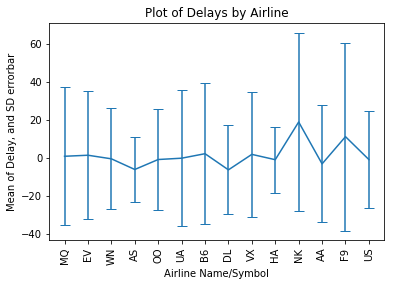

In [7]:
# visualize on training data

# delays across airlines:
airlines = set(data_train['AIRLINE'])

# take mean and sd of delays for each 
ave_delay = []
delay_sd = []
for air in airlines:
    air_vals = data_train[data_train['AIRLINE'] == air]['ARRIVAL_DELAY'].values
    ave_delay.append(np.mean(air_vals))
    delay_sd.append(np.std(air_vals))

#plt.plot(data_train['AIRLINE'], data_train['ARRIVAL_DELAY'])
plt.figure(1)
plt.errorbar(range(len(airlines)), ave_delay, delay_sd, capsize = 5, capthick = 1)
plt.xticks(range(len(airlines)), airlines, rotation='vertical')
plt.title('Plot of Delays by Airline')
plt.xlabel('Airline Name/Symbol')
plt.ylabel('Mean of Delay, and SD errorbar')
plt.show()

Comments: Here we can see that some of the highest delayed airlines are NK (Spirit) and F9 (Frontier), along with a few others. Delta (DL) and AS (Alaskan Air). I would say delays definitely vary across airlines!

### Delay by departure time

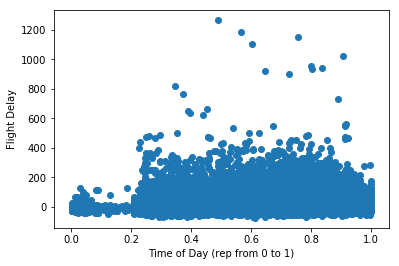

In [8]:
# delays by departure time

# sort the data by deparute (from 0 to 1)
sorted_dept = data_train.sort_values(by='SCHED_DEP_FLOAT', axis=0)

plt.figure(2)
plt.scatter(sorted_dept['SCHED_DEP_FLOAT'], sorted_dept['ARRIVAL_DELAY'])
plt.xlabel('Time of Day (rep from 0 to 1)')
plt.ylabel('Flight Delay')
plt.show()



Comments: Time of departure clearly has a relationship with delay. For flights between midnight and about 5am, there are almost never delays, and after, there still may be trends in the delays.

### Delays for major airports

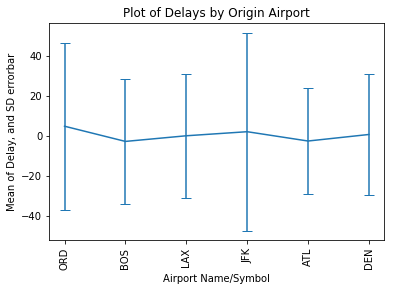

ORD ave delay:  5.00126698917


In [9]:
# delay by airport for major airport as origin

major_airports = ['ORD', 'BOS', 'LAX', 'JFK', 'ATL', 'DEN']

# collect mean and sd for each airport
ave_delay = []
delay_sd = []
for airport in major_airports:
    air_vals = data_train[data_train['ORIGIN_AIRPORT'] == airport]['ARRIVAL_DELAY'].values
    ave_delay.append(np.mean(air_vals))
    delay_sd.append(np.std(air_vals))
    
plt.figure(3)
plt.errorbar(range(len(major_airports)), ave_delay, delay_sd, capsize = 5, capthick = 1)
plt.xticks(range(len(major_airports)), major_airports, rotation='vertical')
plt.title('Plot of Delays by Origin Airport')
plt.xlabel('Airport Name/Symbol')
plt.ylabel('Mean of Delay, and SD errorbar')
plt.show()

print("ORD ave delay: ", ave_delay[0])
    

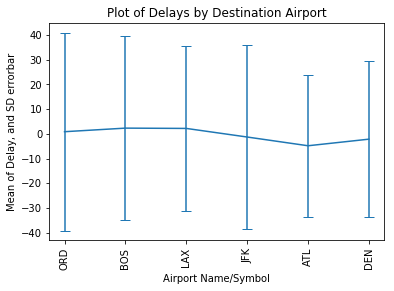

ORD Ave Delay:  0.879399697689


In [10]:
# delay by airport for major airport as destination

# collect mean and sd for each airport
ave_delay2 = []
delay_sd2 = []
for airport in major_airports:
    air_vals = data_train[data_train['DESTINATION_AIRPORT'] == airport]['ARRIVAL_DELAY'].values
    ave_delay2.append(np.mean(air_vals))
    delay_sd2.append(np.std(air_vals))
    
plt.figure(4)
plt.errorbar(range(len(major_airports)), ave_delay2, delay_sd2, capsize = 5, capthick = 1)
plt.xticks(range(len(major_airports)), major_airports, rotation='vertical')
plt.title('Plot of Delays by Destination Airport')
plt.xlabel('Airport Name/Symbol')
plt.ylabel('Mean of Delay, and SD errorbar')
plt.show()

print("ORD Ave Delay: ", ave_delay2[0])

Comments: It is clear that airport of departure/origin also can impact delay time, since we see different average delays for each of these major airports, with ORD and JFK as the highest delay time for origin, and LAX and BOS as the highest delays for destination. It is interesting that these airports rank differently for origin and destination, and it seems like airports could definitely influence delays, which makes sense.

### Delays by airport traffic

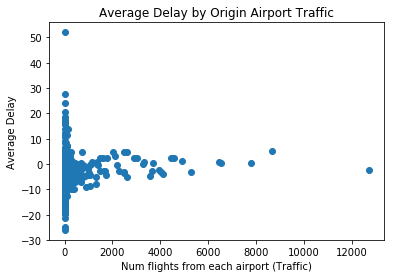

In [11]:
# delay time by origin airport traffic

# collect number of flights (traffic), and mean of the delays
airports = list(set(data_train['ORIGIN_AIRPORT']))
num_flights = []
ave_delay = []
for airport in airports: 
    airport_data = data_train[(data_train['ORIGIN_AIRPORT'] == airport)]['ARRIVAL_DELAY'].values
    num_flights.append(len(airport_data))
    ave_delay.append(np.mean(airport_data))
    
plt.figure(5)
plt.scatter(num_flights, ave_delay)
plt.title("Average Delay by Origin Airport Traffic")
plt.xlabel("Num flights from each airport (Traffic)")
plt.ylabel("Average Delay")
plt.show()

Comments: This is a small sample size, and it is difficult to determine the relationship here. For very small airports, there is no clear trend, but as traffic increases, there is perhaps a small positive relationship between traffic and delays.

### Intermediate Pre-Processing: One-hot encoding

In [12]:
# pre-processing, one-hot for origin_airport, destination_airport, airlines, etc.

categorical_columns_g2cols = ['AIRLINE', 'DAY_OF_WEEK', 'MONTH']
data_train = pd.get_dummies(data_train, columns=categorical_columns_g2cols, drop_first=False)
data_test = pd.get_dummies(data_test, columns=categorical_columns_g2cols, drop_first=False)
remaining_data = pd.get_dummies(remaining_data, columns=categorical_columns_g2cols, drop_first=False)
data_train.head()

,DATE,DAY,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,SCHED_ARR,DEPARTURE_DELAY,ARRIVAL_DELAY,...,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,2015-09-19,19,394,N3FMAA,ORD,LGA,07:15:00,10:30:00,9.0,1.0,...,0,0,0,0,0,0,1,0,0,0
5,2015-01-29,29,2784,N966WN,DTW,MDW,09:15:00,09:45:00,-5.0,-19.0,...,0,0,0,0,0,0,0,0,0,0
13,2015-11-24,24,525,N193JB,JFK,TPA,08:30:00,11:33:00,-9.0,-18.0,...,0,0,0,0,0,0,0,0,1,0
18,2015-06-19,19,5033,N872AS,ABE,ATL,12:02:00,14:10:00,-5.0,-17.0,...,0,0,0,1,0,0,0,0,0,0
21,2015-02-07,7,4647,N14920,ORD,CRW,16:15:00,18:43:00,-11.0,-19.0,...,0,0,0,0,0,0,0,0,0,0


# Part 4:

### Build a classification model that classifies delays according to DELAY_OR_NOT. This is an unbalanced dataset, thus consider the appropriate performance metric when reporting your results.

In [13]:
# get the list of predictors to use for the classification model
predictors_remove = ['ARRIVAL_DELAY', 'DATE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'SCHED_ARR', 'DEPARTURE_DELAY', 'ELAPSED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DESTINATION_AIRPORT', 'SCHED_DEP', 'DELAY_OR_NOT', 'ORIGIN_AIRPORT']
predictors_all = list(data_train.columns.values)
for x in predictors_remove:
    predictors_all.remove(x)
preds_class = predictors_all
print("Classification Problem Predictors: ", preds_class)


Classification Problem Predictors:  ['DAY', 'DISTANCE', 'SCHEDULED_TIME', 'SCHED_DEP_FLOAT', 'DESTINATION_TRAFFIC', 'ORIGIN_TRAFFIC', 'AIRLINE_AA', 'AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9', 'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA', 'AIRLINE_US', 'AIRLINE_VX', 'AIRLINE_WN', 'DAY_OF_WEEK_1', 'DAY_OF_WEEK_2', 'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6', 'DAY_OF_WEEK_7', 'MONTH_1', 'MONTH_2', 'MONTH_3', 'MONTH_4', 'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11', 'MONTH_12']


In [14]:
# split training set into training and validation
np.random.seed(9001)
msk = np.random.rand(len(data_train)) < 0.75
train_data = data_train[msk]
valid_data = data_train[~msk]

# split into predictors and response (X and y)
X_train = train_data[preds_class]
Y_train = train_data['DELAY_OR_NOT']
X_valid = valid_data[preds_class]
Y_valid = valid_data['DELAY_OR_NOT']
X_test = data_test[preds_class]
Y_test = data_test['DELAY_OR_NOT']
X_remain = remaining_data[preds_class]
Y_remain = remaining_data['DELAY_OR_NOT']


In [15]:
# pre-processing step, normalize all predictors to be between 0 and 1

def normalize_columns(X, X_min, X_max):
    return (X-X_min)/(X_max-X_min)

# normalize all predictors between 0 and 1 for easy use
normal_predictors = copy.deepcopy(preds_class)
for pred in normal_predictors:
    X_train[pred] = normalize_columns(X=X_train[pred], X_min=min(X_train[pred].values), X_max=max(X_train[pred].values))   
    X_test[pred] = normalize_columns(X=X_test[pred], X_min=min(X_test[pred].values), X_max=max(X_test[pred].values))   
    X_valid[pred] = normalize_columns(X=X_valid[pred], X_min=min(X_valid[pred].values), X_max=max(X_valid[pred].values))   
    X_remain[pred] = normalize_columns(X=X_remain[pred], X_min=min(X_remain[pred].values), X_max=max(X_remain[pred].values))   

X_train.head()    
                 

/Users/joshkuppersmith/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/joshkuppersmith/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/joshkuppersmith/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,DAY,DISTANCE,SCHEDULED_TIME,SCHED_DEP_FLOAT,DESTINATION_TRAFFIC,ORIGIN_TRAFFIC,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,...,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,0.600000,0.141761,0.176737,0.301808,0.218260,0.689160,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
18,0.600000,0.133481,0.166163,0.501391,1.000000,0.006352,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
27,0.000000,0.129443,0.161631,0.851182,0.011727,0.033166,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
46,0.800000,0.193861,0.222054,0.892907,0.013611,0.055369,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
52,0.466667,0.256866,0.293051,0.810153,0.192479,0.393102,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Simple Logistic Regression with CV

In [16]:
# logistic regression model
logregcv = LogisticRegressionCV(penalty='l2') # By default LBGFS induces L2 norm.
logregcv.fit(X_train, Y_train)
print("Accuracy Score: ", logregcv.score(X_valid, Y_valid))
print("But this is not the best measure since this is an unbalanced dataset, so use AUC instead")


Accuracy Score:  0.907104154124
But this is not the best measure since this is an unbalanced dataset, so use AUC instead


### LDA

In [17]:
# lda model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
print("Accuracy Score: ", lda.score(X_valid, Y_valid))


Accuracy Score:  0.905277945013


/Users/joshkuppersmith/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


### QDA

In [18]:
# qda model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, Y_train)
print("Accuracy Score: ", qda.score(X_valid, Y_valid))

/Users/joshkuppersmith/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy Score:  0.676359622717


### Logistic with Poly Terms

In [19]:
# logistic model with polynomial terms

# including all polynomial terms and interaction terms makes this model too slow to run
# include polynomial terms
#poly = PolynomialFeatures(degree = 2, include_bias = False, interaction_only=True)
X_train_poly = copy.deepcopy(X_train)
X_valid_poly = copy.deepcopy(X_valid)
X_test_poly = copy.deepcopy(X_test)

preds = X_train.columns.values
for predictor in ['DAY', 'DISTANCE', 'SCHEDULED_TIME', 'SCHED_DEP_FLOAT', 'ORIGIN_TRAFFIC', 'DESTINATION_TRAFFIC']:
    title = predictor + "_2"
    title2 = predictor + "_3"
    X_train_poly[title] = X_train_poly[predictor] ** 2
    X_valid_poly[title] = X_valid_poly[predictor] ** 2
    X_test_poly[title] = X_test_poly[predictor] ** 2
    X_train_poly[title2] = X_train_poly[predictor] ** 3
    X_valid_poly[title2] = X_valid_poly[predictor] ** 3
    X_test_poly[title2] = X_test_poly[predictor] ** 3

lr_poly = LogisticRegressionCV(penalty='l2') # By default LBGFS induces L2 norm.
lr_poly.fit(X_train_poly, Y_train)
print("Accuracy Score: ", lr_poly.score(X_valid_poly, Y_valid))
print("So our accuracy on the validation data is boosted very slightly by adding these polynomial terms. A more careful analysis of which polynomial terms are significant, and what interaction terms might be useful and could boost performance even more.")

Accuracy Score:  0.907645996388
So our accuracy on the validation data is boosted very slightly by adding these polynomial terms. A more careful analysis of which polynomial terms are significant, and what interaction terms might be useful and could boost performance even more.


In [20]:
# pre-written function to display ROC curve for a model
def roc_curve(model, X, Y, title):
    preds = model.predict_proba(X)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(Y, preds)
    fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(Y, [0 for y in Y])
    roc_auc_2 = metrics.auc(fpr_2, tpr_2)
    plt.figure(figsize=(20,10))
    lw = 2
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.4f) {}'.format(title) % roc_auc)
    plt.plot([0], [0], marker='o', markersize=10, lw = 0, color="red", label ='ROC curve (area = 0) Naive Classifier')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.02, 1.0])
    plt.ylim([-0.02, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right", prop={'size':20})
    plt.show()

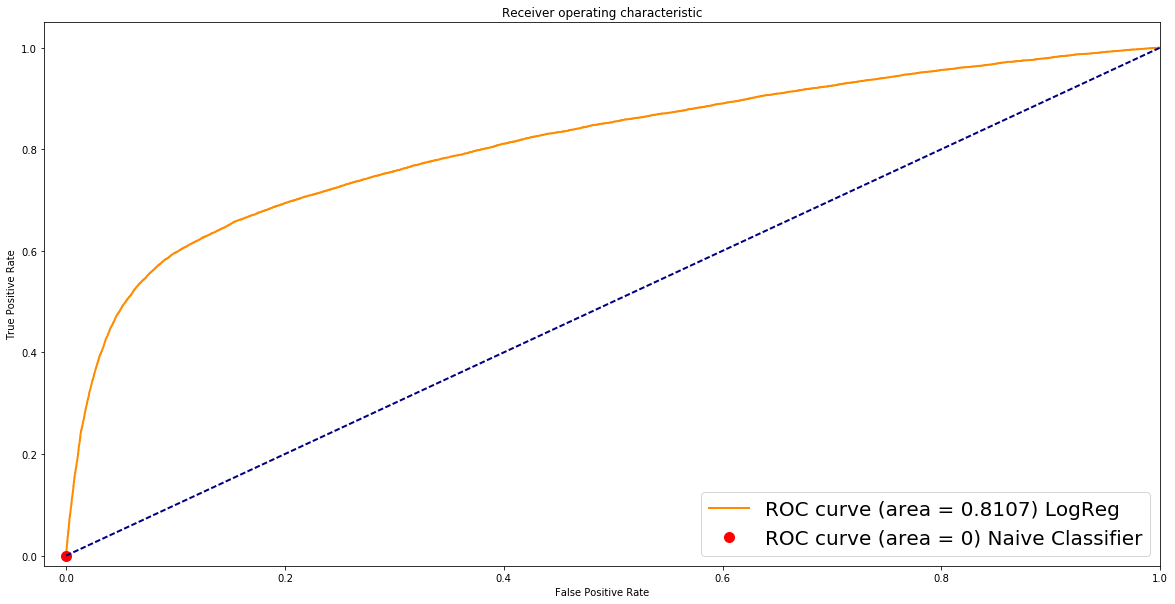

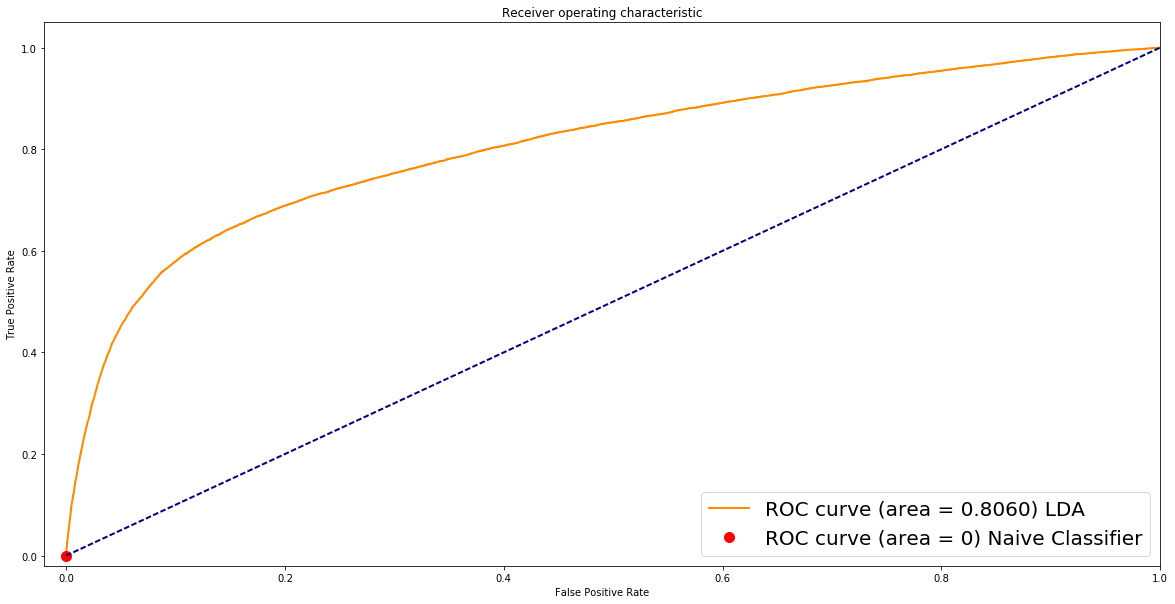

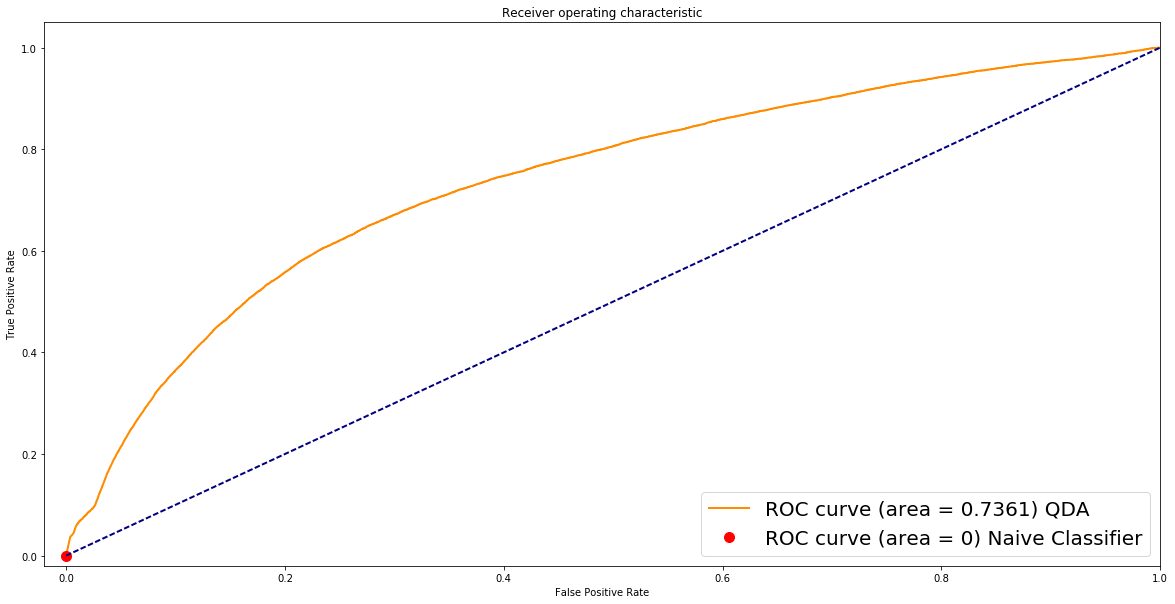

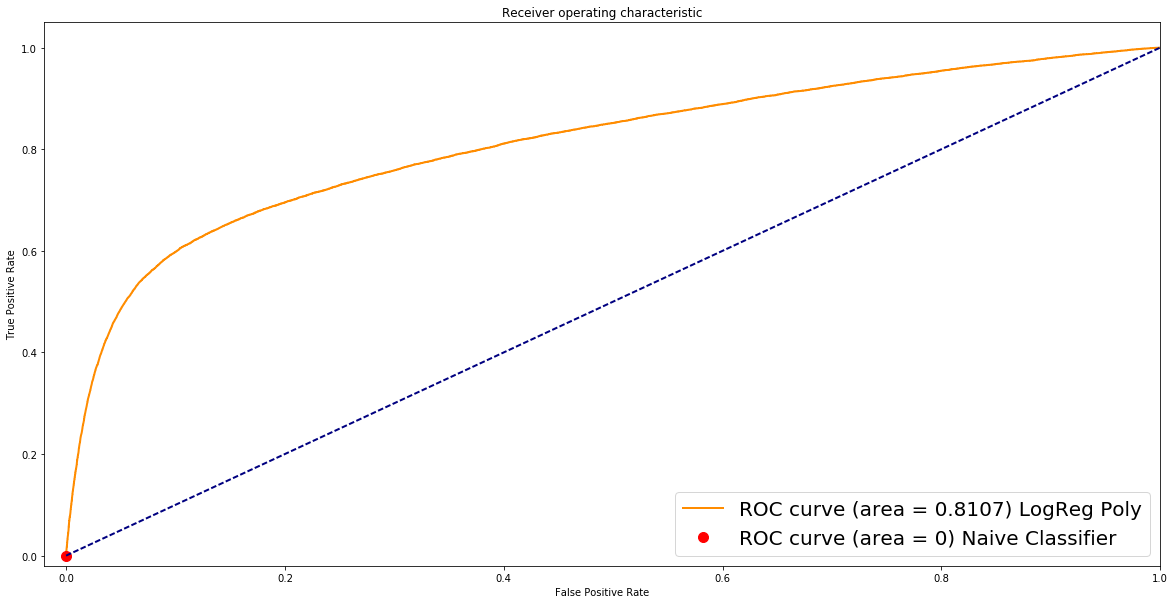

In [21]:
roc_curve(logregcv, X_train, Y_train, 'LogReg')
roc_curve(lda, X_train, Y_train, 'LDA')
roc_curve(qda, X_train, Y_train, 'QDA')
roc_curve(lr_poly, X_train_poly, Y_train, 'LogReg Poly')

Comments: simply logistic regression seems to be the best model on this set, since it is essentially tied with the polynomial term logistic regression for performance, but is simpler and more efficient.

In [22]:
# simple Logistic Regression on this set seems to be the best model
# so we will display these coefficients
for i in range(len(preds_class)):
    print('Coefficient for {}: {}'.format(preds_class[i], logregcv.coef_[0][i]))

Coefficient for DAY: -0.06269070719774932
Coefficient for DISTANCE: -4.558243764638298
Coefficient for SCHEDULED_TIME: 5.767905730776717
Coefficient for SCHED_DEP_FLOAT: 5.698700833814338
Coefficient for DESTINATION_TRAFFIC: 0.3396044742333251
Coefficient for ORIGIN_TRAFFIC: 0.1942135552111503
Coefficient for AIRLINE_AA: -0.2593064805775563
Coefficient for AIRLINE_AS: -1.4436199566641605
Coefficient for AIRLINE_B6: 0.43598416587614236
Coefficient for AIRLINE_DL: -1.3419955005380593
Coefficient for AIRLINE_EV: 0.2209625273208871
Coefficient for AIRLINE_F9: 1.0041565731139335
Coefficient for AIRLINE_HA: -1.163603166813929
Coefficient for AIRLINE_MQ: 0.44526013645062457
Coefficient for AIRLINE_NK: 1.9375211086609228
Coefficient for AIRLINE_OO: -0.15428480283811524
Coefficient for AIRLINE_UA: 0.25256220061344303
Coefficient for AIRLINE_US: -0.42895273464612005
Coefficient for AIRLINE_VX: 0.22881308221786215
Coefficient for AIRLINE_WN: 0.08520019592304194
Coefficient for DAY_OF_WEEK_1: 0.36

# Part 5:

### Given your model, comment on the importance of factors as related to whether a flight is delayed.

The original model that I tested did not use the SCHED_DEP_FLOAT, ORIGIN_TRAFFIC, DESTINATION_TRAFFIC or the airlines/day_of_week/month one-hot data, and had an AUC of 0.59, as specified in the hint section of this assignment. When training these classification models, I used these one-hot encoded columns, and the other predictors that I designed, and this immediately improved the performance of the classifier by a significant amount. In addition, with this task in mind, I tried 4 different models- Simple Logistic, LDA, QDA, and Logistic with polynomial terms. QDA performed poorly, but the rest performed well, with Simple and Polynomial logistic essentially tied for performance, and since Simple Logistic is an efficient and transparent model, I chose this as the best model, and displayed its predictor coefficients above (it had Classification rate of 0.907104154124, and AUC of 0.8107). Based on the coefficients, there are a few columns that have more predictive power than others. SCHED_DEP (the departure time) has a very large coefficient, and it is positive, so the later the departure time is, the more likely there is a delay, which makes sense. Similarly, SCHEDULED_TIME has a large positive coefficient, so perhaps longer flights tend to be more delayed. At the same time, DISTANCE has a large negative coefficient, so this information in contradictory, and perhaps the effects of distance and scheduled time essentially cancel out. In addition, Spirit Airlines (NK) and Frontier (F9) are much more likely to delay a flight, with significant coefficients, and Delta (DL), Alaskan Air (AS), US Airways (US), and Hawaiian Air (HA) are less likely to delay flights with a significant coefficient. Most other predictors show relatively low values, meaning a somewhat insignificant direct connection to flight delays. We must remember that there is likely some degree of collinearity between these predictors so certain effects that we may expect out of one predictor may be captured by another, but in general, these large coefficient values indicate significant predictive impact.

# Part 6:

### Evaluate your model(s) on your test set, and finally provide a visual to show which airlines are predicted to have the most delays using all the data excluding the training and test set.

Accuracy Score for Test Data:  0.905599935731


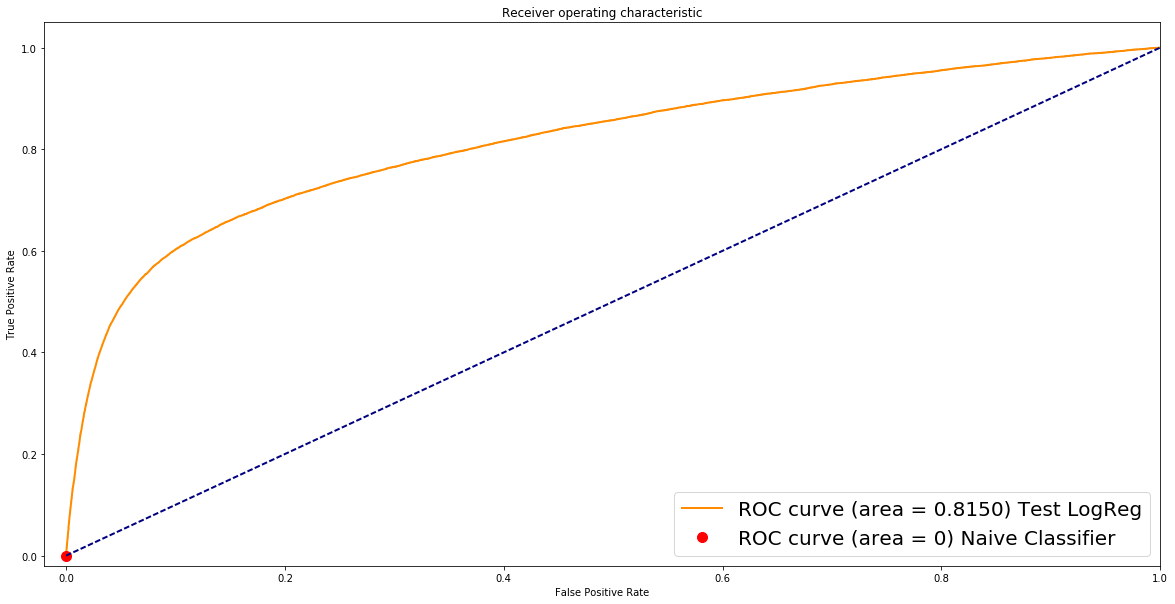

In [23]:
print("Accuracy Score for Test Data: ", logregcv.score(X_test, Y_test))
roc_curve(logregcv, X_test, Y_test, 'Test LogReg')

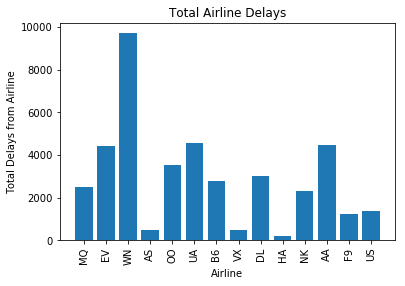

But this is a flawed measurement because some airlines will simply have way more flights than others. Instead, we can print out delays/#flights to get the probability that a flight is delayed


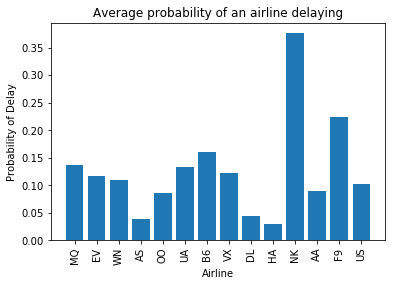

In [24]:
remaining_data.head()

orig_remaining_data['prediction'] = logregcv.predict(remaining_data[preds_class])
airlines = list(set(orig_remaining_data['AIRLINE'].values))
sum_delays = []
prob_delay = []
for airline in airlines:
    airline_data = orig_remaining_data[orig_remaining_data['AIRLINE'] == airline]
    sum_delays.append(sum(airline_data['DELAY_OR_NOT']))
    if(len(airline_data) == 0):
        prob_delay.append(0)
    else:
        prob_delay.append(sum(airline_data['DELAY_OR_NOT'])/len(airline_data))
    
plt.figure(6)
plt.bar(range(len(airlines)), sum_delays)
plt.xlabel('Airline')
plt.ylabel('Total Delays from Airline')
plt.title('Total Airline Delays')
plt.xticks(range(len(airlines)), airlines, rotation='vertical')
plt.show()

print("But this is a flawed measurement because some airlines will simply have way more flights than others. Instead, we can print out delays/#flights to get the probability that a flight is delayed")

plt.figure(7)
plt.bar(range(len(airlines)), prob_delay)
plt.xlabel('Airline')
plt.ylabel('Probability of Delay')
plt.title('Average probability of an airline delaying')
plt.xticks(range(len(airlines)), airlines, rotation='vertical')
plt.show()
    

Comments: Here, we see that the AUC for the test set is actually higher than on the training data, at 0.8150, and the Classification Accuracy is 0.905599935731 showing a solid performance for the logistic regression model with the selected predictors. In addition, our predicted probabilities of delaying flights match both the observations made about the coefficients, and the EDA performed earlier (low delays for HA, DL, AS, and high delays for NK and F9).

# Part 7:

### Build a regression model that predicts the length of delay (on the log scale) given that a flight is truly delayed.

In [25]:
# save a copy of the data, with our premade categories, but no one-hot
data2 = copy.deepcopy(data)
data2.head()


,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT,SCHED_DEP_FLOAT,DESTINATION_TRAFFIC,ORIGIN_TRAFFIC
0,2015-09-19,9,19,6,AA,394,N3FMAA,ORD,LGA,07:15:00,...,127.0,NaN,NaN,NaN,NaN,NaN,0,0.302083,11355,34829
1,2015-10-28,10,28,3,AA,375,N4YDAA,11298,13342,20:15:00,...,118.0,NaN,NaN,NaN,NaN,NaN,0,0.843750,403,3251
2,2015-08-19,8,19,3,MQ,3648,N512MQ,XNA,ORD,12:22:00,...,88.0,NaN,NaN,NaN,NaN,NaN,0,0.515278,37058,1206
3,2015-12-01,12,1,2,WN,4096,N912WN,PHX,BWI,11:20:00,...,235.0,NaN,NaN,NaN,NaN,NaN,0,0.472222,11632,21429
4,2015-09-15,9,15,2,WN,285,N7718B,MCI,DEN,14:10:00,...,97.0,NaN,NaN,NaN,NaN,NaN,0,0.590278,27488,5489


In [26]:
# RE-DO PRE PROCESSING ON NEW DATA

# first, only take data that has been delayed
data_delay = data2[data2['DELAY_OR_NOT'] == 1]

# split into train/test and do not touch test data until our final test
# less data, so no need to deal with remaining, just split 50/50 train/test

np.random.seed(9001)
msk = np.random.rand(len(data_delay)) < 0.5
data_train2 = data_delay[msk]
data_test2 = data_delay[~msk]

print(len(data_train2))
print(len(data_test2))


41042
41065


In [27]:
# pre-processing, one-hot for airline, day_of_week, month
categorical_columns_g2cols = ['AIRLINE','DAY_OF_WEEK', 'MONTH']
data_train2 = pd.get_dummies(data_train2, columns=categorical_columns_g2cols, drop_first=True)
data_test2 = pd.get_dummies(data_test2, columns=categorical_columns_g2cols, drop_first=True)

data_train2.head()

,DATE,DAY,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,SCHED_ARR,DEPARTURE_DELAY,ARRIVAL_DELAY,...,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
19,2015-01-04,4,958,N211WN,PHL,ATL,18:35:00,20:50:00,121.0,132.0,...,0,0,0,0,0,0,0,0,0,0
70,2015-08-19,19,6144,N11539,ABE,ORD,17:22:00,18:30:00,22.0,18.0,...,0,0,0,0,0,1,0,0,0,0
123,2015-03-14,14,1673,N256WN,BDL,MDW,15:05:00,16:30:00,35.0,33.0,...,1,0,0,0,0,0,0,0,0,0
151,2015-11-12,12,2701,N283JB,BUF,JFK,18:31:00,20:00:00,42.0,43.0,...,0,0,0,0,0,0,0,0,1,0
158,2015-07-05,5,1579,N65832,LAX,DEN,20:20:00,23:35:00,35.0,24.0,...,0,0,0,0,1,0,0,0,0,0


In [28]:
# get the regression problem predictors
predictors_remove = ['ARRIVAL_DELAY', 'DATE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'SCHED_ARR', 'DEPARTURE_DELAY', 'ELAPSED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SCHED_DEP', 'DELAY_OR_NOT', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
predictors_all = list(data_train2.columns.values)
for x in predictors_remove:
    predictors_all.remove(x) 
preds_reg = predictors_all
print("Regression Problem Predictors: ", preds_reg)

Regression Problem Predictors:  ['DAY', 'DISTANCE', 'SCHEDULED_TIME', 'SCHED_DEP_FLOAT', 'DESTINATION_TRAFFIC', 'ORIGIN_TRAFFIC', 'AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9', 'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA', 'AIRLINE_US', 'AIRLINE_VX', 'AIRLINE_WN', 'DAY_OF_WEEK_2', 'DAY_OF_WEEK_3', 'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6', 'DAY_OF_WEEK_7', 'MONTH_2', 'MONTH_3', 'MONTH_4', 'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11', 'MONTH_12']


In [29]:
# split training data into train and validation
np.random.seed(9001)
msk4 = np.random.rand(len(data_train2)) < 0.75
train_data2 = data_train2[msk4]
valid_data2 = data_train2[~msk4]

# split data into predictors and response (X and y)
# make sure to use log scale for the response variable
X_train2 = train_data2[preds_reg]
Y_train2 = np.log10(train_data2['ARRIVAL_DELAY'].values)
X_valid2 = valid_data2[preds_reg]
Y_valid2 = np.log10(valid_data2['ARRIVAL_DELAY'].values)
X_test2 = data_test2[preds_reg]
Y_test2 = np.log10(data_test2['ARRIVAL_DELAY'].values)

In [30]:
# pre-processing step, normalize all predictors to be between 0 and 1

def normalize_columns(X, X_min, X_max):
    return (X-X_min)/(X_max-X_min)

normal_predictors = copy.deepcopy(preds_reg)
for pred in normal_predictors:
    X_train2[pred] = normalize_columns(X=X_train2[pred], X_min=min(X_train2[pred].values), X_max=max(X_train2[pred].values))   
    X_test2[pred] = normalize_columns(X=X_test2[pred], X_min=min(X_test2[pred].values), X_max=max(X_test2[pred].values))   
    X_valid2[pred] = normalize_columns(X=X_valid2[pred], X_min=min(X_valid2[pred].values), X_max=max(X_valid2[pred].values))   
    
X_train2.head()    
                

/Users/joshkuppersmith/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/joshkuppersmith/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/joshkuppersmith/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

,DAY,DISTANCE,SCHEDULED_TIME,SCHED_DEP_FLOAT,DESTINATION_TRAFFIC,ORIGIN_TRAFFIC,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
19,0.100000,0.128231,0.174507,0.774373,1.000000,0.170456,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151,0.366667,0.054523,0.104704,0.771588,0.230073,0.047195,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
166,0.833333,0.194871,0.247344,0.784123,0.008440,0.512002,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,0.133333,0.031906,0.060698,0.607242,0.166744,0.118413,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
249,0.566667,0.300081,0.291351,0.541086,0.313031,0.106124,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
# OLS MODEL
print('Predictors: ', X_train2.columns.values)
ols = LinearRegression(fit_intercept=True)
ols.fit(X_train2, Y_train2)
print()
print('OLS Train Score', r2_score(Y_train2, ols.predict(X_train2)))
print('OLS Valid Score', r2_score(Y_valid2, ols.predict(X_valid2)))
print('OLS Test Score', r2_score(Y_test2, ols.predict(X_test2)))



Predictors:  ['DAY' 'DISTANCE' 'SCHEDULED_TIME' 'SCHED_DEP_FLOAT' 'DESTINATION_TRAFFIC'
 'ORIGIN_TRAFFIC' 'AIRLINE_AS' 'AIRLINE_B6' 'AIRLINE_DL' 'AIRLINE_EV'
 'AIRLINE_F9' 'AIRLINE_HA' 'AIRLINE_MQ' 'AIRLINE_NK' 'AIRLINE_OO'
 'AIRLINE_UA' 'AIRLINE_US' 'AIRLINE_VX' 'AIRLINE_WN' 'DAY_OF_WEEK_2'
 'DAY_OF_WEEK_3' 'DAY_OF_WEEK_4' 'DAY_OF_WEEK_5' 'DAY_OF_WEEK_6'
 'DAY_OF_WEEK_7' 'MONTH_2' 'MONTH_3' 'MONTH_4' 'MONTH_5' 'MONTH_6'
 'MONTH_7' 'MONTH_8' 'MONTH_9' 'MONTH_10' 'MONTH_11' 'MONTH_12']

OLS Train Score 0.0373735789644
OLS Valid Score 0.025059813133
OLS Test Score 0.0381651306603


In [32]:
# OLS with polynomial terms

X_train3 = copy.deepcopy(X_train2)
X_valid3 = copy.deepcopy(X_valid2)
X_test3 = copy.deepcopy(X_test2)

# add polynomial terms
for predictor in ['DAY', 'DISTANCE', 'SCHEDULED_TIME', 'SCHED_DEP_FLOAT', 'ORIGIN_TRAFFIC', 'DESTINATION_TRAFFIC']:
    title = predictor + "_2"
    title2 = predictor + "_3"
    X_train3[title] = X_train3[predictor] ** 2
    X_valid3[title] = X_valid3[predictor] ** 2
    X_test3[title] = X_test3[predictor] ** 2
    X_train3[title2] = X_train3[predictor] ** 3
    X_valid3[title2] = X_valid3[predictor] ** 3
    X_test3[title2] = X_test3[predictor] ** 3
    
# add some intuitive interaction terms
string = "INTER_"
term_num = 1
# terms between airlines and all other factors
airlines = ['AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9', 'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA', 'AIRLINE_US', 'AIRLINE_VX', 'AIRLINE_WN']
others = ['DAY', 'DISTANCE', 'SCHEDULED_TIME', 'SCHED_DEP_FLOAT', 'DESTINATION_TRAFFIC', 'ORIGIN_TRAFFIC', 'DAY_OF_WEEK_2','DAY_OF_WEEK_3', 'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6','DAY_OF_WEEK_7']    
for airline in airlines:
    for other in others:
        title = string + str(term_num)
        X_train3[title] = X_train3[airline]* X_train3[other]
        X_valid3[title] = X_valid3[airline]*X_valid3[other]
        X_test3[title] = X_test3[airline]*X_test3[other]
        term_num += 1
        
# a few more potentially interesting interaction terms
string = "INTER_2_"
term_num = 1
# terms between days of the week and other factors
days_of_week = ['DAY_OF_WEEK_2','DAY_OF_WEEK_3', 'DAY_OF_WEEK_4', 'DAY_OF_WEEK_5', 'DAY_OF_WEEK_6','DAY_OF_WEEK_7']
others2 = ['DISTANCE', 'SCHEDULED_TIME', 'SCHED_DEP_FLOAT', 'DESTINATION_TRAFFIC','ORIGIN_TRAFFIC']       
for day in airlines:
    for other in others2:
        title = string + str(term_num)
        X_train3[title] = X_train3[day]* X_train3[other]
        X_valid3[title] = X_valid3[day]*X_valid3[other]
        X_test3[title] = X_test3[day]*X_test3[other]
        term_num += 1

# OLS model
ols2 = LinearRegression(fit_intercept=True)
ols2.fit(X_train3, Y_train2)
print('OLS Train Score', r2_score(Y_train2, ols2.predict(X_train3)))
print('OLS Valid Score', r2_score(Y_valid2, ols2.predict(X_valid3)))
print('OLS Test Score', r2_score(Y_test2, ols2.predict(X_test3)))



OLS Train Score 0.0472546966959
OLS Valid Score 0.0275138714838
OLS Test Score 0.0401109787072


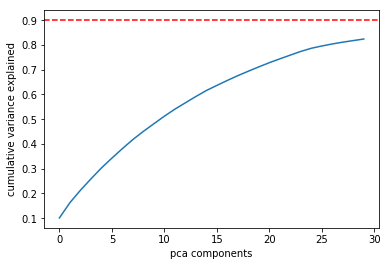

OLS Train Score 0.0231679300927
OLS Valid Score 0.0197212042953
OLS Test Score 0.0248779123648

As expected, using PCA to reduce dimensionality simply gives us less information to predict on, so it hurts our model.


In [33]:
# try using PCA to reduce dimensionality
pca = PCA()
pca.fit(X_train3)
var_c = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(30), var_c[0:30])
plt.axhline(0.9,ls='--',color='red')
plt.xlabel("pca components")
plt.ylabel("cumulative variance explained")
plt.show()

# so let's try 20 PCA components to try to avoid overfitting
pca_comp = 20
X_train_pca = pca.transform(X_train3)[:,:pca_comp]
X_test_pca = pca.transform(X_test3)[:,:pca_comp]
X_valid_pca = pca.transform(X_valid3)[:,:pca_comp]

# OLS model. Uses PCA    
ols2 = LinearRegression(fit_intercept=True)
ols2.fit(X_train_pca, Y_train2)
print('OLS Train Score', r2_score(Y_train2, ols2.predict(X_train_pca)))
print('OLS Valid Score', r2_score(Y_valid2, ols2.predict(X_valid_pca)))
print('OLS Test Score', r2_score(Y_test2, ols2.predict(X_test_pca)))

print()
print("As expected, using PCA to reduce dimensionality simply gives us less information to predict on, so it hurts our model.")

In [34]:
# KNN model with many values of k
valid_scores = []

# The code below is commented out because it takes a long time to run
# however, this loop was used to determine the best n_neighbors value for
# knn, which ended up being 81.

#ns = range(1,301,10)
#for n in ns:
#    knn = KNeighborsRegressor(n_neighbors=n)
#    knn.fit(X_train2, Y_train2)
#    valid_scores.append(r2_score(Y_valid2, knn.predict(X_valid2)))
#index = valid_scores.index(max(valid_scores))
#best_n = ns[index]
    
print("N = {}".format(81))
knn = KNeighborsRegressor(n_neighbors=81)
knn.fit(X_train2, Y_train2)
print('KNN Train Score', r2_score(Y_train2, knn.predict(X_train2)))
print('KNN Valid Score', r2_score(Y_valid2, knn.predict(X_valid2)))
print('KNN Test Score', r2_score(Y_test2, knn.predict(X_test2)))

# so we see significant overfitting here, with high training score and low test and validation

N = 81
KNN Train Score 0.0516988726722
KNN Valid Score 0.0217741114247
KNN Test Score 0.0267380800165


Comments: OLS with several added polynomial and interaction terms is the best model here, with the highest r2 value. KNN overfits, and PCA hurts performance because it limits predictive information. A possible next step to help performance is to run predictor selection on the interaction term dataset to find the best set of predictors (avoid overfitting), and boost this OLS model even further. 

# Part 8:

### Write a report (in the last markdown cell in your notebook with your findings (without code)). Describe the main design decisions you have made with justifications. Clearly explain your methodology and results. This should not be more than 300 words. You may use up to 5 diagrams.

In this project, the first essential design decision was determining which predictors were valuable. Many predictors gave direct information about the outcome (delay), and I did not use these to avoid training a model based on its results. Instead, I used many numeric predictors, as well as columns that I made: DELAY_OR_NOT (classification response), SCHED_DEP_FLOAT, and TRAFFIC predictors, as well as several one-hot encoded predictors. These decisions were informed by logical consideration and EDA findings. In the classification problem, I took samples of data for training, validation, and test sets. These additional predictors that I created greatly boosted performance of the classifier, and in the end, I found that a Simple Logistic Regression yielded the best results out of Logistic, LDA, QDA, and Poly Logistic. This yielded test accuracy of 0.905, and AUC of 0.8150 (since delayed flights are relatively rare, AUC is a good way to measure success because it heavily weighs the true positive rate). I found that when predicting with this model, previous findings and assumptions about specific airlines were confirmed, making me confident in this model’s classification ability. For the regression model, we were predicting for ARRIVAL_DELAY based on data with DELAY_OR_NOT = 1 (“flight truly delayed”). A simple OLS model performed decently well, and I found that adding several polynomial and interaction terms significantly boosted performance (up to test r2 of 0.04011).  This OLS model with polynomial/interaction terms was the best model. KNN (with k chosen by validation testing) significantly overfit the training data, and using PCA to reduce dimensionality simplified, but did not benefit performance. In general, with this data (which had relatively low predictive capabilities), simple models tended to perform better since they did not overfit training data. I have figures and comments with each step to help explain. 

	
